<a href="https://colab.research.google.com/github/Yaswantthhh/Heart_disease_prediction/blob/main/AL_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, accuracy_score

In [3]:
# Load the dataset
df = pd.read_csv('heart_disease1.csv')

In [4]:
# Data Preprocessing
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
# Impute missing values using the median
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [6]:
# Normalize the dataset using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

In [7]:
# Separate features and target variable
X = df_scaled.drop('target', axis=1)
y = df_imputed['target']

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Function to evaluate and plot results
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    # Compute Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Print Metrics
    print(f'{model_name} Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'AUC-ROC: {roc_auc:.4f}')

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    return accuracy, precision, recall, f1

Random Forest Metrics:
Accuracy: 0.8852
Precision: 0.9310
Recall: 0.8438
F1-Score: 0.8852
AUC-ROC: 0.9440


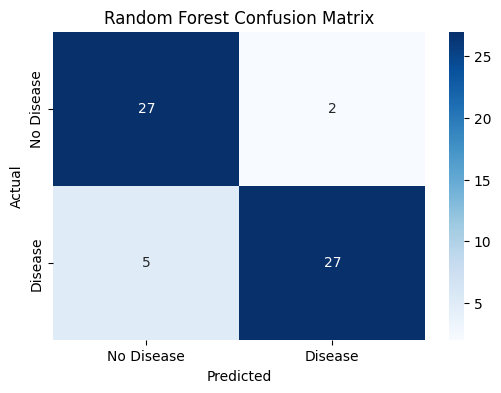

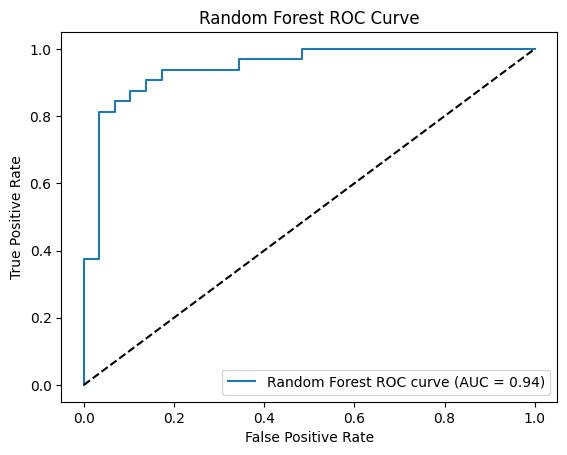

In [10]:
# Train Random Forest with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_metrics = evaluate_model(best_rf, X_test, y_test, "Random Forest")

SVM Metrics:
Accuracy: 0.8689
Precision: 0.8750
Recall: 0.8750
F1-Score: 0.8750
AUC-ROC: 0.9256


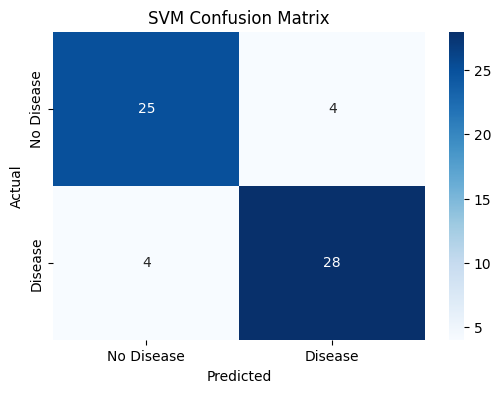

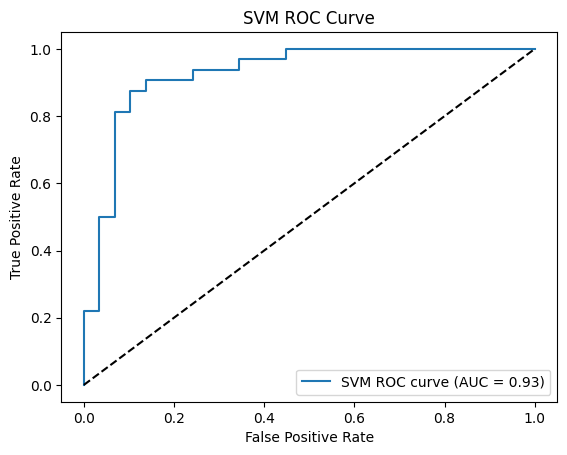

In [11]:
# Train SVM with Hyperparameter Tuning
svm_params = {'C': [1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_
svm_metrics = evaluate_model(best_svm, X_test, y_test, "SVM")


In [12]:
# Combine Results
metrics_df = pd.DataFrame([rf_metrics, svm_metrics], columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=['Random Forest', 'SVM'])
print(metrics_df)

               Accuracy  Precision   Recall  F1-Score
Random Forest  0.885246   0.931034  0.84375  0.885246
SVM            0.868852   0.875000  0.87500  0.875000
